<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA%E5%89%AF%E6%9C%AC02_%E5%A5%BD%E7%8E%A9%E7%9A%84%E6%96%87%E5%AD%97%E7%94%9F%E5%9C%96--%E9%85%B7%E7%82%AB%E7%9A%84%20diffusion%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Diffusion Models

和 GAN 一樣, 都是可以給一個我們叫 latent vector 特徵向量, 就生出圖來的 diffusion models, 其實本質上比較接近 autoencoder。

我們之前有說, 用 autoencoder 似乎生不出太不一樣的圖。不過事實證明, 如果讓電腦看夠多, 它就會生出各種各樣的圖來!

傳統 diffusion models 的 latent vector 大小和你要生的圖是一樣的, 如此計算量自然大增、訓練也不易。Stable Diffusion 先訓練一個 VAE 把圖壓下來到我們希望的維度, 再去進行 diffusion models 訓練。

當然更重要的是, Stable Diffusion 是開源的! 於是基於 Stable Diffusion 改善強化的模型也紛紛出籠。繼 `transformers` 之後, HuggingFace 又推出 `diffusers` 方便大家使用酷炫文字生圖的 diffusion models。

我們這裡以 AltDiffusion 這個模型為例, 主要是它可以接受中文提示。學會了當然就可以用其他各式 diffusion models。

首先先安裝必要套件。

In [2]:
!pip install transformers
!pip install diffusers["torch"]
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 109.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.3 MB/s eta 0:00:00


### 2. 使用 `diffusers` pipeline 一條龍服務

In [5]:
import torch

In [6]:
from diffusers import AltDiffusionPipeline


從預訓練模型讀入。

In [7]:
pipe = AltDiffusionPipeline.from_pretrained("BAAI/AltDiffusion-m9", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/diffusers/pipelines/alt_diffusion/pipeline_alt_diffusion.py:153: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 in the configuration file. Please make sure to update the config accordingly as leaving `sample_size=32` in the config might lead to incorrect results in future versions. If you have downlo

### 3. 開始創作!

現在你可以打入一段 "咒語", AI 就會幫忙把圖生出來!

In [47]:
prompt = "拿著雨傘，在等公車的小女孩, 非常詳細，幻想，非常詳細，數位繪畫，概念藝術，敏銳的焦點，插圖"

In [48]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

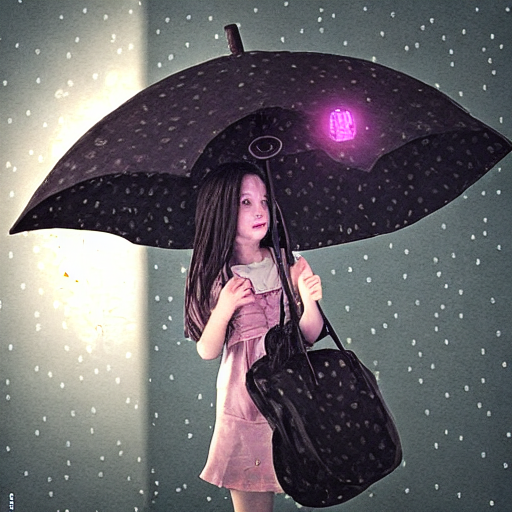

In [49]:
image